<a href="https://colab.research.google.com/github/barbarakotlan/CSCI_4170/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 1 - Ensemble Learning

Projects in AI & ML, Spring 2026

Barbara Kotlan

1/26/2026

#Task 1 (30 points):
Implement a Decision Tree Classifier for your classification problem. You
may use a built-in package to implement your classifier. Additionally, do the following:

• Visualize the decision tree structure for at least three different parameter settings.
Comment on how the depth and complexity change the tree.

• Do some research on what sensitivity analysis is and how it is performed (include
citations). Perform a sensitivity analysis to measure the impact of at least two input
features on your model's decision boundary.

In [1]:
#1.1)

!pip install ucimlrepo
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt

# load dataset

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
meta = breast_cancer_wisconsin_diagnostic.metadata

# variable information
vars = breast_cancer_wisconsin_diagnostic.variables



/tmp/ipython-input-1599792039.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'B': 0, 'M': 1})


Accuracy: 0.9210526315789473


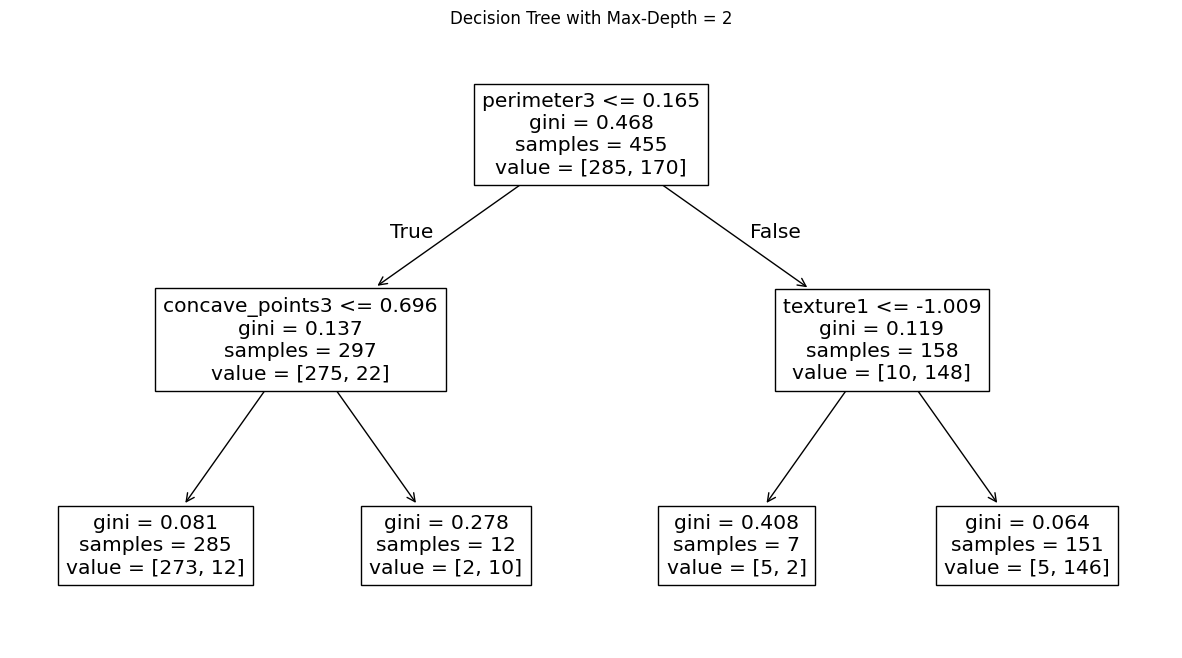

Accuracy: 0.9122807017543859


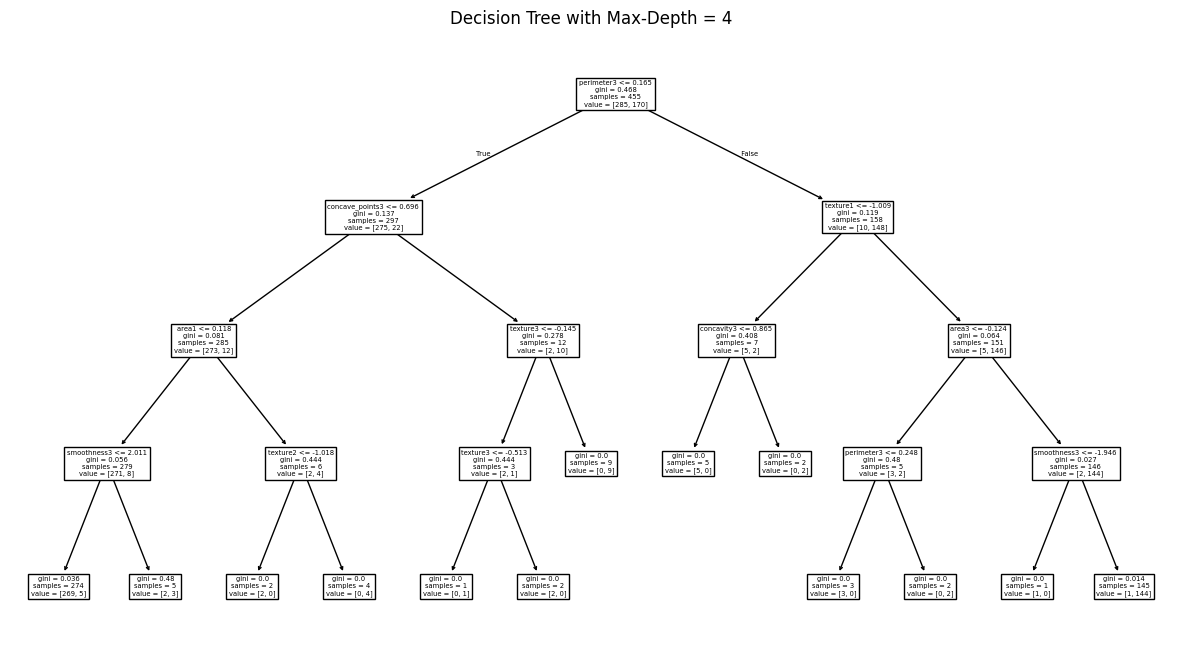

Accuracy: 0.9298245614035088


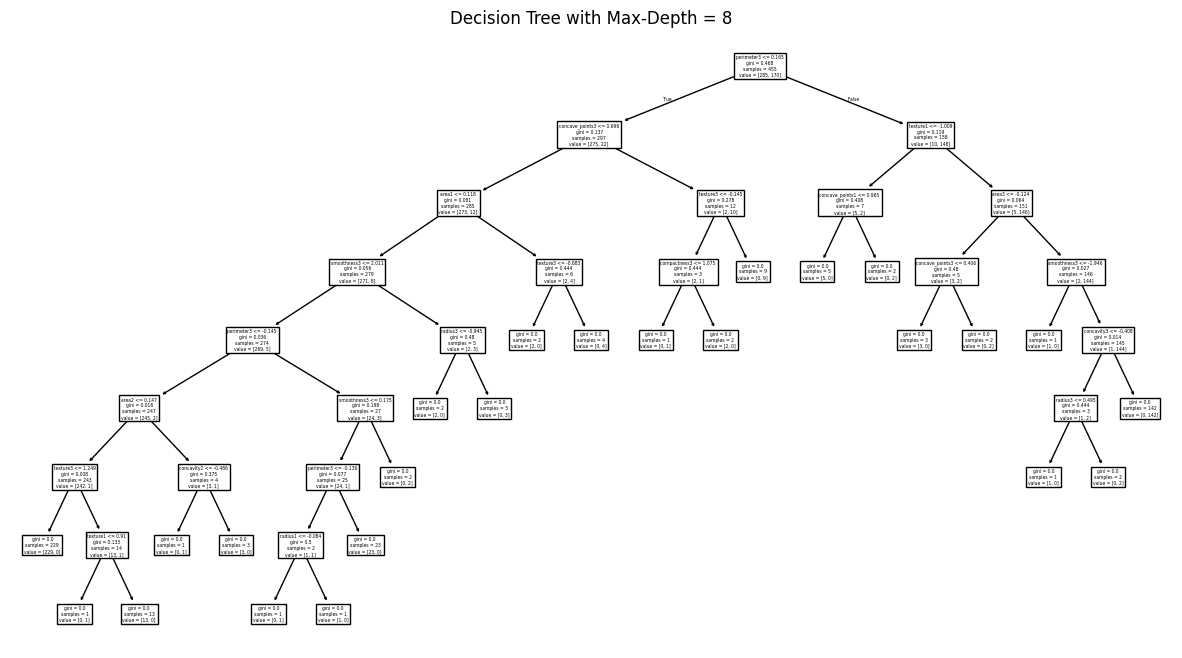

In [2]:
# prepare data

#map data
y = y.replace({'B': 0, 'M': 1})

# scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train, test, split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# apply model
max_depths = [2, 4, 8]

for depth in max_depths:
  model = DecisionTreeClassifier(max_depth=depth, random_state=42)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  # evaluate model
  print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))

  # visualization
  plt.figure(figsize=(15,8))
  plot_tree(model, feature_names=X.columns)
  plt.title("Decision Tree with Max-Depth = {}".format(depth))
  plt.show()


#1.1)
As shown by the first decision tree above with a max depth of 2, it is a very simple and balanced tree. It has an accuracy of 0.92, which is good for such a simple tree. The tree of a max depth of 4 is more complex and not balanced. It does use more features than the previous. It has an accuracy of 0.91. Finally, the last tree with a max depth of 8 is very large and complex. It is clearly unbalanced and it contains a lot of features. It is the most accuracy with a value of 0.93. This tree does risk overfitting due to the many nodes and splits in the tree.

#1.2)
Sensitivity Analysis

Sensitivity analysis is done to determine how changes in variables impact an outcome (Jones, 2021). It shows how different values of an independent variable impact a given dependent variable. It also includes making a few assumptions about variables. Sensitivity analysis involves altering one or more variables and comparing the results to the original analysis (Nahhas, 2026). It often leaves other features at a mean value to view the impact of changing the selected features. By performing sensitivity analysis, analysts can identify which variables have the greatest effect on the outcome and which have minimal impact. This insight helps prioritize areas for further study, refine models, and improve decision-making. It can also reveal potential risks or uncertainties in the model, ensuring more robust and reliable results.




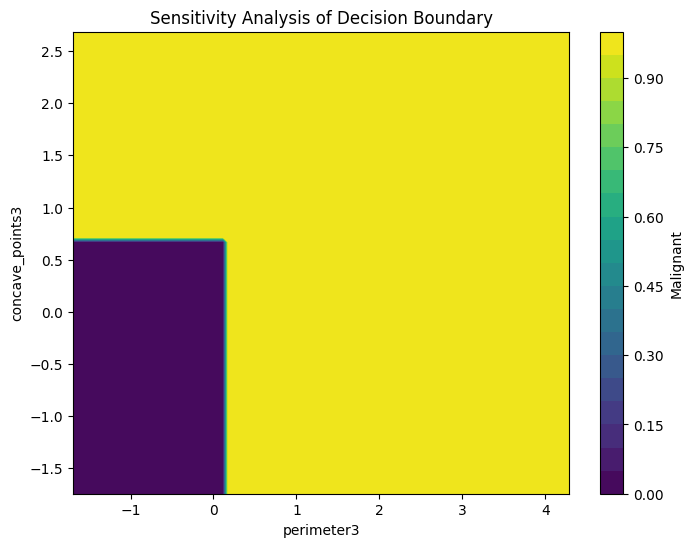

In [3]:
# sensitivity analysis
import numpy as np

# choose features
feature_1 = "perimeter3"
feature_2 = "concave_points3"

# feature indexes
idx1 = X.columns.get_loc(feature_1)
idx2 = X.columns.get_loc(feature_2)

# feature values across ranges
x1_range = np.linspace(X_scaled[:, idx1].min(), X_scaled[:, idx1].max(), 100)
x2_range = np.linspace(X_scaled[:, idx2].min(), X_scaled[:, idx2].max(), 100)

# create grid of ranges
xx1, xx2 = np.meshgrid(x1_range, x2_range)

# fix other features at their mean
X_mean = np.mean(X_scaled, axis=0)
grid_points = np.tile(X_mean, (xx1.size, 1))

# replace columns with their varying values
grid_points[:, idx1] = xx1.ravel()
grid_points[:, idx2] = xx2.ravel()

# predicted probabilities of class 1
Z = model.predict_proba(grid_points)[:, 1]
Z = Z.reshape(xx1.shape)

# visualization
plt.figure(figsize=(8,6))
contour = plt.contourf(xx1, xx2, Z, levels=20)
plt.colorbar(contour, label="Malignant")
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title("Sensitivity Analysis of Decision Boundary")
plt.show()



Task 2 (30 points): From the Bagging and Boosting ensemble methods pick any one algorithm from each category. Implement both the algorithms using the same data.  

• Use stratified k-fold cross-validation with at least three different folds (e.g., 5, 10, 15).
You may do your own research on this technique (include citations).

• Evaluate the models using any three-evaluation metrics of your choice (e.g. accuracy,
Precision, F1-score etc.).

• Comment on the behavior of each algorithm under the metrics. Does the performance
ranking change based on the metric used? Why?

In [4]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score
from xgboost import XGBClassifier
import numpy as np

y = y.squeeze()

models = [["RandomForest", RandomForestClassifier(n_estimators=100, random_state=42)], ["XGBoost", XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)]]
metrics = []

# for each model
for name, model in models:

  folds = [5, 10, 15]

  # for each fold number
  for fold in folds:

    # perform stratified k fold
    skf = StratifiedKFold(n_splits=fold)

    accs, precs, f1s = [], [], []

    # for each number in fold
    for train_idx, test_idx in skf.split(X, y):
      # gets data split
      X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
      y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

      # gets model & results
      model.fit(X_train, y_train)

      y_pred = model.predict(X_test)

      # saves metrics
      accs.append(accuracy_score(y_test, y_pred))
      precs.append(precision_score(y_test, y_pred))
      f1s.append(f1_score(y_test, y_pred))

    metrics.append({"Model": name, "Fold": fold, "Accuracy": np.mean(accs), "Precision": np.mean(precs), "F1 Score": np.mean(f1s)})

for item in metrics:
  print(f"{item["Model"]} with {item["Fold"]} folds metrics: \n Accuracy: {item["Accuracy"]} \n Precision: {item["Precision"]} \n F1 Score: {item["F1 Score"]}\n")



RandomForest with 5 folds metrics: 
 Accuracy: 0.9560937742586555 
 Precision: 0.9529453390346904 
 F1 Score: 0.9404495683580102

RandomForest with 10 folds metrics: 
 Accuracy: 0.9631578947368421 
 Precision: 0.9624452930745836 
 F1 Score: 0.9496055227308773

RandomForest with 15 folds metrics: 
 Accuracy: 0.9649122807017542 
 Precision: 0.9669155844155845 
 F1 Score: 0.9506022353482495

XGBoost with 5 folds metrics: 
 Accuracy: 0.968390001552554 
 Precision: 0.9712783529573092 
 F1 Score: 0.9570119063076714

XGBoost with 10 folds metrics: 
 Accuracy: 0.9701441102756894 
 Precision: 0.9715829098437794 
 F1 Score: 0.9589561720815267

XGBoost with 15 folds metrics: 
 Accuracy: 0.9684210526315788 
 Precision: 0.9734267040149392 
 F1 Score: 0.9558413610654991



#2.3)
Behavior of each algorithm under the metrics

Random Forest: Accuracy increases just slightly as the folds increase. Folds tend to reduce variance, which explains the increase. The precision also improved with the folds, similarly to accuracy. The f1 score increased a little too. This is since f1 balances precison and recall, so recall may not improve as fast as precision did. Overall RandomForest improved from more folds.

XGBoost: Accuracy was higher than RandomForest for all folds. The highest accuracy was the 10 fold. Precision was consistently higher than rf, with 15 folds being the best. The f1 score was also higher and strongest at 10 folds. Overall, 10 folds was the most stable for XGBoost.


XGBoost out performed RandomForest in all metrics. It was consistently higher, peaking at a fold of 10.



#Task 3 (40 points):
Compare the effectiveness of the three models implemented above. Analyze
the results using the following:

• A confusion matrix for one selected test fold.

• A statistical test (e.g., paired t-test) to determine if differences between models are
significant.

• A discussion on the trade-off between bias and variance for each model.

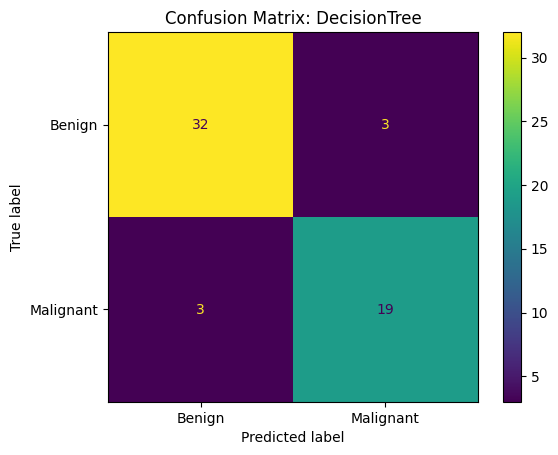

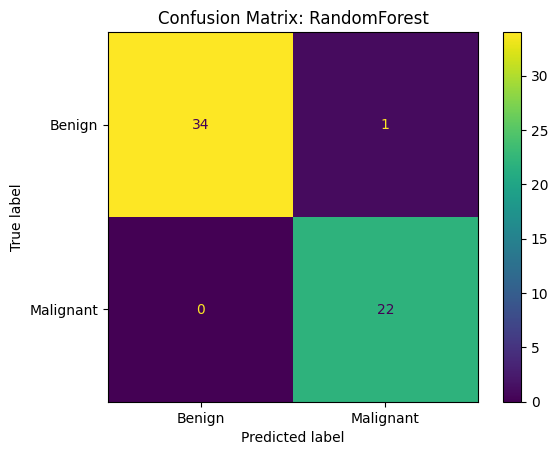

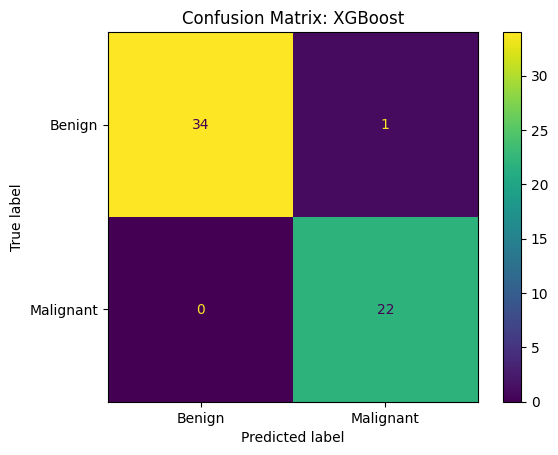

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# models
models = [["DecisionTree", DecisionTreeClassifier(max_depth=4, random_state=42)], ["RandomForest", RandomForestClassifier(n_estimators=100, random_state=42)], ["XGBoost", XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)]]

# for each model
for name, model in models:

  fold = 10

  # gets splits
  skf = StratifiedKFold(n_splits=fold)

  accs, precs, f1s = [], [], []

  # gets data for split
  train_idx, test_idx = next(skf.split(X, y))
  X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
  y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

  # gets model & results
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  # visualization
  cm = confusion_matrix(y_test, y_pred)
  display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
  display.plot()
  plt.title(f"Confusion Matrix: {name}")
  plt.show()




In [6]:
from sklearn.model_selection import cross_val_score
from scipy import stats

# score per model
dt_scores = cross_val_score(DecisionTreeClassifier(max_depth=8, random_state=42), X, y, cv=10)
rf_scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X, y, cv=10)
xgb_scores = cross_val_score(XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42), X, y, cv=10)

# median values
print(f"DecisionTree Mean: {dt_scores.mean():.3f}")
print(f"RandomForest Mean: {rf_scores.mean():.3f}")
print(f"XGBoost Mean: {xgb_scores.mean():.3f}\n")

# stats test for each pair of models
t_stat, p_value = stats.ttest_rel(dt_scores, rf_scores)
print("DecisionTree vs RandomForest:")
if p_value < 0.05:
  sig = ""
else:
  sig = "not"
print(f"The difference is {sig} statistically significant\n")

t_stat, p_value = stats.ttest_rel(dt_scores, xgb_scores)
print("DecisionTree vs XGBoost:")
if p_value < 0.05:
  sig = ""
else:
  sig = "not"
print(f"The difference is {sig} statistically significant\n")

t_stat, p_value = stats.ttest_rel(rf_scores, xgb_scores)
print("RandomForest vs XGBoost:")
if p_value < 0.05:
  sig = ""
else:
  sig = "not"
print(f"The difference is {sig} statistically significant\n")


DecisionTree Mean: 0.928
RandomForest Mean: 0.963
XGBoost Mean: 0.970

DecisionTree vs RandomForest:
The difference is  statistically significant

DecisionTree vs XGBoost:
The difference is  statistically significant

RandomForest vs XGBoost:
The difference is not statistically significant



#2.3)
Bias vs Variance Trade off

Decision Tree:
There may be a higher bias based on the max depth. With the chosen value of 8, there is a chance that the tree is unable to perfectly fit all the training points. If this is too low, then the underfit would be a higher bias.
The variance is high compared to other models. A single tree is sensitive to small changes in training data, causing a higher variance. This model favors simplicity, bias control, for unstable predictions with high variance.

RandomForest:
There is less bias in rf over a decision tree. This is due to the aggregation of multiple trees with reduces overfitting. The variance is also much lower, since bagging reduces sensitivity from individual data points. It is more of a complex model, but its more stable with variance and bias.

XGBoost:
The bias is this model is especially low. This is because gradient boosting sequentially corrects errors for fit compexl patterns. Variance however may be higher than RandomForest if there is not enough tuning. Boosting can easily overfit. The learning rate combats this, controlling how much each tree contributes. It has a trade off of a bit of variance for a low bias.


From all of these results, XGBoost is the clear winner for best model on this data. RandomForest is also a great model that is almost just as good. The DecisionTree is lacking behind, being significantly worse.

Citations

Nahhas, R. W. (2026). Introduction to regression methods for public health using R. Wright State University. https://ramzinahhas.github.io/regression_methods_book/

Jones, E. R. (2021). Sensitivity analysis. The Decision Lab. https://thedecisionlab.com/reference-guide/statistics/sensitivity-analysis